# Class imbalance exploration
<p>Exploring class imbalance oversampling code for integration</p>

# Initialize environment

In [1]:
import sys
import os

WORKING_DIR = f'{os.getcwd()}' 
MAGRITTE_DIR = f'{WORKING_DIR}/../../magritte'
UTILITIES_DIR = f'{MAGRITTE_DIR}/utilities'

DATA_DIR = f'{WORKING_DIR}/../../data/mimiciii/working'

# Add the UTILITY_DIR to the path to import files
sys.path.append(UTILITIES_DIR)


print(f'Environment configured:')
print(f'WORKING_DIR:   {WORKING_DIR}')
print(f'MAGRITTE_DIR:  {MAGRITTE_DIR}')
print(f'UTILITIES_DIR: {UTILITIES_DIR}')
print(f'DATA_DIR:      {DATA_DIR}')


Environment configured:
WORKING_DIR:   /home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad
MAGRITTE_DIR:  /home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad/../../magritte
UTILITIES_DIR: /home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad/../../magritte/utilities
DATA_DIR:      /home/magni/ML_Root/project_root/mimic-iii_LL/scratchpad/../../data/mimiciii/working


In [2]:
import pandas as pd
import pickle
import DataUtils

# Load Data

In [3]:
# Loading the IMDB Dataset
ORIG_DF = pd.read_pickle(f'{DATA_DIR}/notes_combined.pkl.gz')

from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#ORIG_DF['ICD9_CODE'] = le.fit_transform(ORIG_DF['ICD9_CODE'])

# Changing target column from string to 0,1. Label encoding not yet included in framework
#ORIG_DF['sentiment'] = np.where(ORIG_DF['sentiment']=='positive', 1, 0)

DataUtils.exploreDataframe(ORIG_DF)

dataframe shape: (58328, 6)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 58328 entries, 0 to 58327
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HADM_ID     58328 non-null  float64
 1   TEXT        58328 non-null  object 
 2   ROW_ID      58328 non-null  int64  
 3   SUBJECT_ID  58328 non-null  int64  
 4   SEQ_NUM     58328 non-null  float64
 5   ICD9_CODE   58328 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.1+ MB
None

Null value count by column:


HADM_ID       0
TEXT          0
ROW_ID        0
SUBJECT_ID    0
SEQ_NUM       0
ICD9_CODE     0
dtype: int64



First 5 in dataframe


,HADM_ID,TEXT,ROW_ID,SUBJECT_ID,SEQ_NUM,ICD9_CODE
0,100001.0,Admission Date: [**2117-9-11**] ...,464704,58526,1.0,25013
1,100003.0,Admission Date: [**2150-4-17**] ...,446055,54610,1.0,53100
2,100006.0,Admission Date: [**2108-4-6**] Discharg...,110907,9895,1.0,49320
3,100007.0,Admission Date: [**2145-3-31**] ...,256425,23018,1.0,56081
4,100009.0,Admission Date: [**2162-5-16**] ...,6306,533,1.0,41401



Last 5 in dataframe


,HADM_ID,TEXT,ROW_ID,SUBJECT_ID,SEQ_NUM,ICD9_CODE
58323,199993.0,Admission Date: [**2161-10-23**] Discha...,232053,20785,1.0,41031
58324,199994.0,Admission Date: [**2188-7-7**] Discharg...,265424,23761,1.0,486
58325,199995.0,Admission Date: [**2137-12-11**] Discha...,216925,19412,1.0,4210
58326,199998.0,Admission Date: [**2119-2-18**] ...,305582,27200,1.0,41401
58327,199999.0,Admission Date: [**2136-4-4**] D...,380657,40370,1.0,48284


In [4]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'TEXT'
TARGET_COLUMN = 'ICD9_CODE'
UNIQUE_COLUMN = None   # Unique index column. If None, one will be created

In [5]:
# Code frequency distribution for data frame with SEPARATE notes
topICD_codes, bottomICD_codesList = DataUtils.showUniqueColVals(ORIG_DF, colName='ICD9_CODE', showRecords=5)

Data type of column [ICD9_CODE] is: object
Total number of rows: 58328
Unique values in column: 2769 [percent unique: 4.7%]
Null values in column: 0
List of unique values:
['25013' '53100' '49320' ... '6141' '6398' '88121']

Top 5 records by frequency for ICD9_CODE
     ICD9_CODE  record_count
833      41401          3497
2731     V3000          3427
2732     V3001          2695
47        0389          2043
822      41071          1747

Bottom 5 records by frequency for ICD9_CODE
     ICD9_CODE  record_count
2768     V7281             1
577      28411             1
598      28749             1
603      28802             1
605      28804             1


In [6]:
# Filter records for top 5 ICD9_CODE
ORIG_DF_filtered = ORIG_DF.loc[ORIG_DF['ICD9_CODE'].isin(topICD_codes)]

# Check results of filtering
topICD_codes, bottomICD_codesList = DataUtils.showUniqueColVals(ORIG_DF_filtered, colName='ICD9_CODE', showRecords=5)

Data type of column [ICD9_CODE] is: object
Total number of rows: 13409
Unique values in column: 5 [percent unique: 0.0%]
Null values in column: 0
List of unique values:
['41401' 'V3000' 'V3001' '0389' '41071']

Top 5 records by frequency for ICD9_CODE
  ICD9_CODE  record_count
2     41401          3497
3     V3000          3427
4     V3001          2695
0      0389          2043
1     41071          1747

Bottom 5 records by frequency for ICD9_CODE
  ICD9_CODE  record_count
1     41071          1747
0      0389          2043
4     V3001          2695
3     V3000          3427
2     41401          3497


In [7]:
import DataPackageSupport as dps

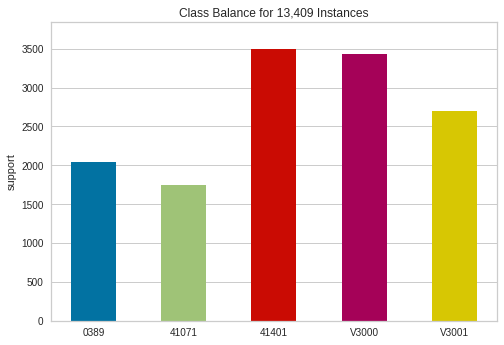

In [8]:
dps.displayClassBalance(data=ORIG_DF_filtered,
                        columnName=TARGET_COLUMN,
                        verbose=False,
                        showRecords=5)

In [16]:
X = ORIG_DF_filtered[[DATA_COLUMN]].copy()
print(f'X.shape: {X.shape}')
Y = ORIG_DF_filtered[[TARGET_COLUMN]].copy()
print(f'Y.shape: {Y.shape}')

X.shape: (13409, 1)
Y.shape: (13409, 1)


In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=987)
X_bal, Y_bal = ros.fit_resample(X, Y)

print(f'X_bal.shape: {X_bal.shape}')
print(f'Y_bal.shape: {Y_bal.shape}')

X_bal.reset_index(drop=True, inplace=True)
Y_bal.reset_index(drop=True, inplace=True)
ORIG_DF_bal = pd.concat([X_bal, Y_bal], axis=1)
display(ORIG_DF_bal.head())
display(ORIG_DF_bal.info())

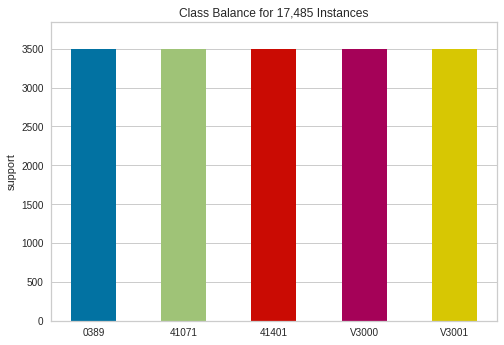

In [25]:
dps.displayClassBalance(data=ORIG_DF_bal,
                        columnName=TARGET_COLUMN,
                        verbose=False,
                        showRecords=5)

In [32]:
from imblearn.over_sampling import RandomOverSampler

def classBalanceOversample(dataFrame,
                           columnName,
                           random_state=987):
    # Display the initial state
    tDf = dataFrame.copy()
    dps.displayClassBalance(data=tDf,
                            columnName=columnName,
                            verbose=True)

    # Split dataset into X/Y
    y_unbal = tDf[[columnName]].copy()
    x_unbal = tDf.copy()
    
    
    print(f'Oversampling data to match max class')
    ros = RandomOverSampler(random_state=random_state)
    x_bal, y_bal = ros.fit_resample(x_unbal, y_unbal)
    
    
    dps.displayClassBalance(data=x_bal,
                        columnName=columnName,
                        verbose=True)

    # Return the balanced dataset
    return x_bal

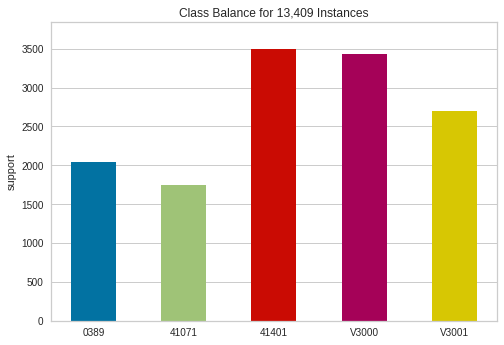

,ICD9_CODE,ttlCol
0,41071,1747
1,0389,2043
2,V3001,2695
3,V3000,3427
4,41401,3497


Oversampling data to match max class


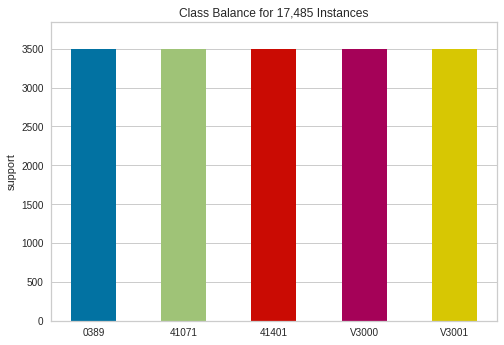

,ICD9_CODE,ttlCol
0,0389,3497
1,41071,3497
2,41401,3497
3,V3000,3497
4,V3001,3497


In [33]:
retDF = classBalanceOversample(dataFrame=ORIG_DF_filtered,
                               columnName=TARGET_COLUMN)

In [35]:
print(retDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17485 entries, 0 to 17484
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HADM_ID     17485 non-null  float64
 1   TEXT        17485 non-null  object 
 2   ROW_ID      17485 non-null  int64  
 3   SUBJECT_ID  17485 non-null  int64  
 4   SEQ_NUM     17485 non-null  float64
 5   ICD9_CODE   17485 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 819.7+ KB
None


# Scratchpad